In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import joblib

# DATA

In [2]:
# import data and print description

mnist = fetch_openml('mnist_784', version=1, cache = True, as_frame = False)
print(mnist.DESCR)

c:\Users\Bruger\anaconda3\envs\pystat\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# devide the data inte X, data, and y, target, variables. y saved as positive intergers
X = mnist['data']
y = mnist['target'].astype(np.uint8)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
# Dividing into train (50.000), val (10.000) and test (10.000) set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

# EDA

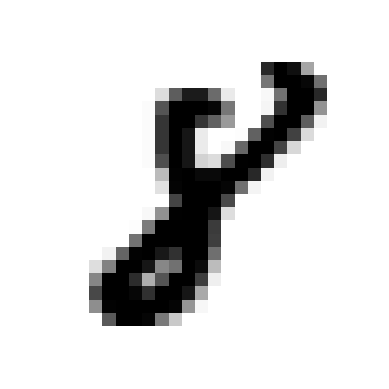

In [7]:
# checking one image. Reshape to an 28x28 array. Kod fraån boken 86
digit = X_train[4]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [8]:
# checking the taget label for X[5]
y_train[4]

8

In [19]:
digit = X_train[4]
digit_image = digit.reshape(28, 28)

# Display pixel values instead of the image
print("Pixel values of the image:")
print(digit_image)

Pixel values of the image:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 215. 255. 240.  90.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 138. 254. 254. 248. 143.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  34. 162. 228.
  228. 148.  21.   0.   0.   7.

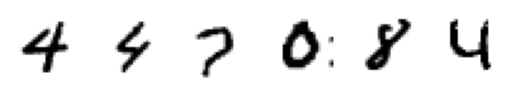

In [9]:
# Cheking some images
images = X_train[:6]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 6)

# Plot each image on a subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28), cmap='binary')
    ax.axis('off')

# Show the plot
plt.show()

In [10]:
y_train[:6]

array([4, 4, 7, 0, 8, 4], dtype=uint8)

Text(0.5, 1.0, 'Distribution of target variables')

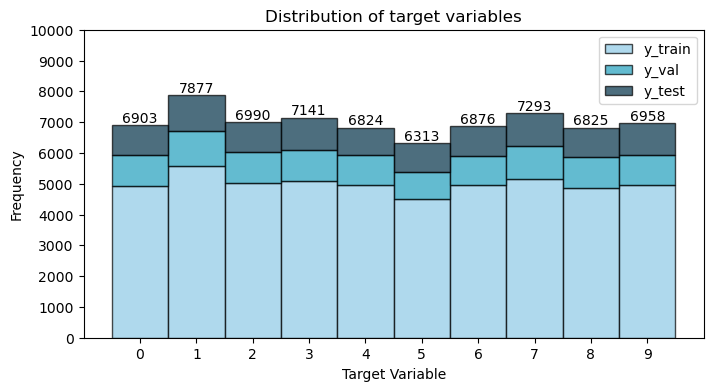

In [11]:
# target distribution
unique_values_y, counts_y = np.unique(y, return_counts = True )
#table_y = np.column_stack((unique_values_y, counts_y)
# #print(table_y)

fig, ax = plt.subplots(figsize=(8, 4))
plt.hist([y_train, y_val, y_test], bins=np.arange(-0.5, 10.5, 1), 
         edgecolor='black', color=['#8ecae6', '#219ebc', '#023047'], alpha=0.7, label=['y_train', 'y_val','y_test'], stacked=True)
for value, count in zip(unique_values_y, counts_y):
    plt.text(value, count, str(count), ha='center', va='bottom')
    
plt.xticks(range(10)) 
plt.yticks(range(0, 11000, 1000))
plt.legend()
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of target variables')

# MODEL TRAINING

Random Forrest Classifier

In [34]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [5]:
# save
#joblib.dump(rf, "model_rf.pkl") 
# load
rf_clf = joblib.load("model_rf.pkl")

In [24]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Random Forrest Classifier with Gridsearch

In [6]:
randomforrest = RandomForestClassifier(random_state=1)
params_rf = {'n_estimators': [300, 400, 500], 'max_depth': [None, 10, 20]}
gs_rf = GridSearchCV(randomforrest, params_rf, cv=3, scoring='accuracy')

# Perform the grid search
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [9]:
# Get the best parameters and best estimator
gs_rf_best_estimator = gs_rf.best_estimator_
gs_rf_params = gs_rf.best_params_
score_gs_rf = gs_rf.best_score_
print(gs_rf_best_estimator)
print(gs_rf_params)
print(score_gs_rf)

RandomForestClassifier(n_estimators=500, random_state=1)
{'max_depth': None, 'n_estimators': 500}
0.9667000551744636


In [6]:
# save
#joblib.dump(gs_rf_best_estimator, "model_gs_rf.pkl") 
# load
gs_rf_clf = joblib.load("model_gs_rf.pkl")

KNN model without gridsearch

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# save
#joblib.dump(knn, "model_knn.pkl") 
# load
knn_clf = joblib.load("model_knn.pkl")

In [23]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

KNN model with Gridsearch

In [13]:
params_knn = {'n_neighbors': [4, 5, 6], 'weights': ['uniform', 'distance']}
gs_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=3, scoring='accuracy')
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [15]:
# Get the best parameters and best estimator
gs_knn_best_estimator = gs_knn.best_estimator_
gs_knn_params = gs_knn.best_params_
score_gs_knn = gs_knn.best_score_
print(gs_knn_best_estimator)
print(gs_knn_params)
print(score_gs_knn)

KNeighborsClassifier(n_neighbors=4, weights='distance')
{'n_neighbors': 4, 'weights': 'distance'}
0.9691600167756634


In [8]:
# save
#joblib.dump(gs_knn_best_estimator, "model_gs_knn.pkl") 
# load
gs_knn_clf = joblib.load("model_gs_knn.pkl")

KNN classifier with scaled input data

In [52]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier()),
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [9]:
# save
#joblib.dump(knn_pipeline, "model_knn_pipe.pkl") 
# load
knn_pipe_clf = joblib.load("model_knn_pipe.pkl")

SVM with pipeline

In [17]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=1))   
])
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svm', SVC(probability=True, random_state=1))])

In [10]:
# save
#joblib.dump(svm_pipe, "model_svm_pipe.pkl") 
# load
svm_pipe_clf = joblib.load("model_svm_pipe.pkl")

Voting classifier

In [27]:
voting= VotingClassifier(estimators=[
    ('knn', knn_clf),
    ('rf', rf_clf ),
    ('svc', svm_pipe_clf)
], voting='soft')  

voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('pca', PCA(n_components=0.95)),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=1))]))],
                 voting='soft')

In [11]:
# save
#joblib.dump(voting, "model_voting.pkl") 
# load
voting_clf = joblib.load("model_voting.pkl")

# MODEL EVALUATION

In [21]:
models = [
    (rf_clf, 'RandomforrestClassifier'),
    (gs_rf_clf, 'RandomforrestClassifier with Gridsearch'),
    (knn_clf, 'KNeighborsClassifier'),
    (gs_knn_clf, 'KNeighborsClassifier with Gridsearch'),
    (knn_pipe_clf, 'Pipeline with KneighborsClassifier'),
    (svm_pipe_clf, 'Pipeline with SVM'),
    (voting_clf, 'Voting Classifier')
]

accuracy_data = []

for clf, name in models: 
    y_pred = clf.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    #clf_name = clf.__class__.__name__ 
    accuracy_data.append({'Name': name, 'Score': score})
    
display(accuracy_data)

[{'Name': 'RandomforrestClassifier', 'Score': 0.9691},
 {'Name': 'RandomforrestClassifier with Gridsearch', 'Score': 0.972},
 {'Name': 'KNeighborsClassifier', 'Score': 0.9702},
 {'Name': 'KNeighborsClassifier with Gridsearch', 'Score': 0.9731},
 {'Name': 'Pipeline with KneighborsClassifier', 'Score': 0.9431},
 {'Name': 'Pipeline with SVM', 'Score': 0.9645},
 {'Name': 'Voting Classifier', 'Score': 0.9782}]

In [29]:
# Skapa data för DataFrame
accuracy_data_pd = pd.DataFrame(accuracy_data)
accuracy_data_pd = accuracy_data_pd.sort_values(by='Score', ascending=False)

display(accuracy_data_pd)

,Name,Score
6,Voting Classifier,0.9782
3,KNeighborsClassifier with Gridsearch,0.9731
1,RandomforrestClassifier with Gridsearch,0.9720
2,KNeighborsClassifier,0.9702
0,RandomforrestClassifier,0.9691
5,Pipeline with SVM,0.9645
4,Pipeline with KneighborsClassifier,0.9431


In [30]:
# function for evaluation
def evaluation(estimator):
    y_pred = estimator.predict(X_val)
    
    print('Classification report')
    print(classification_report(y_val, y_pred))
    
    print('Confusion Matrix')
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred))
    disp.plot()
    plt.title(f'Confusion Matrix for {estimator}')
    plt.show()
    

Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       0.98      0.99      0.98      1158
           2       0.98      0.97      0.98      1007
           3       0.98      0.96      0.97      1028
           4       0.98      0.98      0.98       966
           5       0.97      0.98      0.98       885
           6       0.99      0.99      0.99       945
           7       0.97      0.98      0.97      1070
           8       0.98      0.96      0.97       988
           9       0.97      0.97      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix


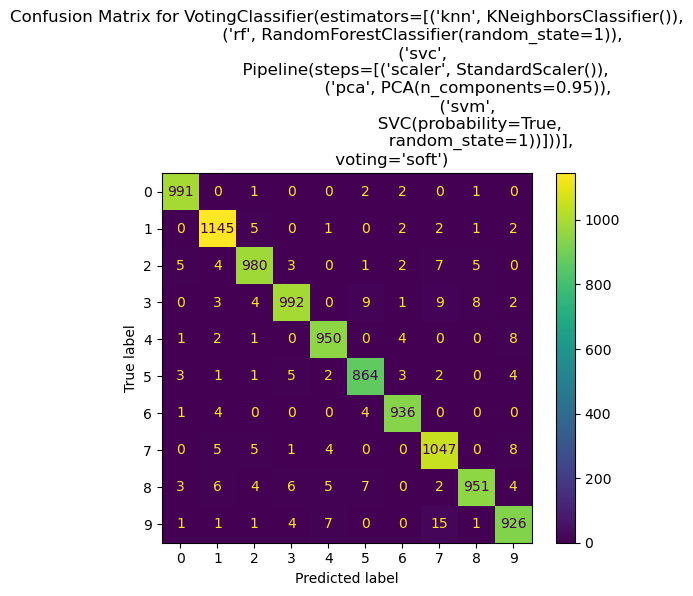

In [49]:
evaluation(voting_clf)

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.96      0.99      0.98      1158
           2       0.98      0.97      0.98      1007
           3       0.98      0.96      0.97      1028
           4       0.98      0.97      0.97       966
           5       0.97      0.97      0.97       885
           6       0.98      0.99      0.99       945
           7       0.96      0.97      0.97      1070
           8       0.99      0.94      0.96       988
           9       0.95      0.97      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix


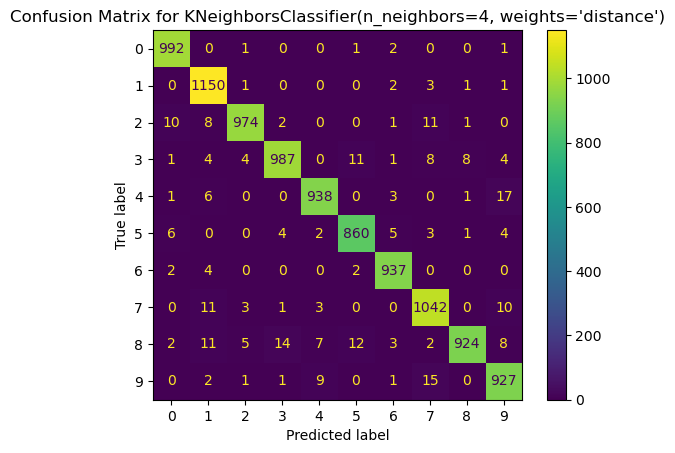

In [33]:
evaluation(gs_knn_clf)

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.96      0.98      0.97      1007
           3       0.97      0.95      0.96      1028
           4       0.97      0.98      0.97       966
           5       0.96      0.96      0.96       885
           6       0.97      0.99      0.98       945
           7       0.97      0.97      0.97      1070
           8       0.97      0.96      0.96       988
           9       0.96      0.96      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix


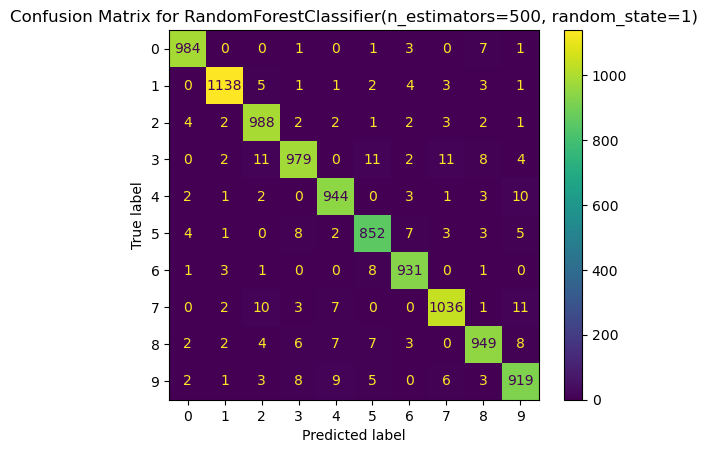

In [34]:
evaluation(gs_rf_clf)

Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       997
           1       0.95      0.99      0.97      1158
           2       0.94      0.94      0.94      1007
           3       0.94      0.94      0.94      1028
           4       0.94      0.93      0.93       966
           5       0.93      0.93      0.93       885
           6       0.96      0.97      0.96       945
           7       0.94      0.94      0.94      1070
           8       0.97      0.89      0.93       988
           9       0.91      0.93      0.92       956

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix


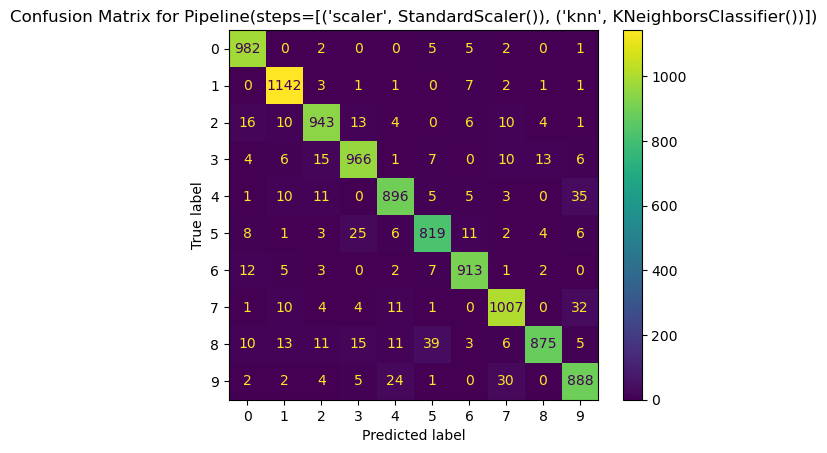

In [35]:
evaluation(knn_pipe_clf)

# FINAL MODEL

In [32]:
# Train the chosen model on the train_val dataset
voting_clf.fit(X_train_val, y_train_val)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('pca', PCA(n_components=0.95)),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=1))]))],
                 voting='soft')

In [2]:
# save
#joblib.dump(voting_clf, "model_final.pkl") 
# load
voting_final = joblib.load("model_final.pkl")

In [36]:
# Testing it on the test set
y_pred = voting_clf.predict(X_test)
score_voting = accuracy_score(y_test, y_pred)
print(score_voting)

0.9772


In [13]:
yp = voting_final.predict(X_test[0].reshape(1, -1))
print(yp)
print(y_test[0])

[8]
8


In [38]:
# classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.97      0.99      0.98      1152
           2       0.98      0.98      0.98       967
           3       0.97      0.97      0.97      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.97      0.98       937
           6       0.98      0.99      0.98       961
           7       0.97      0.98      0.97      1055
           8       0.98      0.95      0.97       969
           9       0.97      0.97      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Confusion Matrix


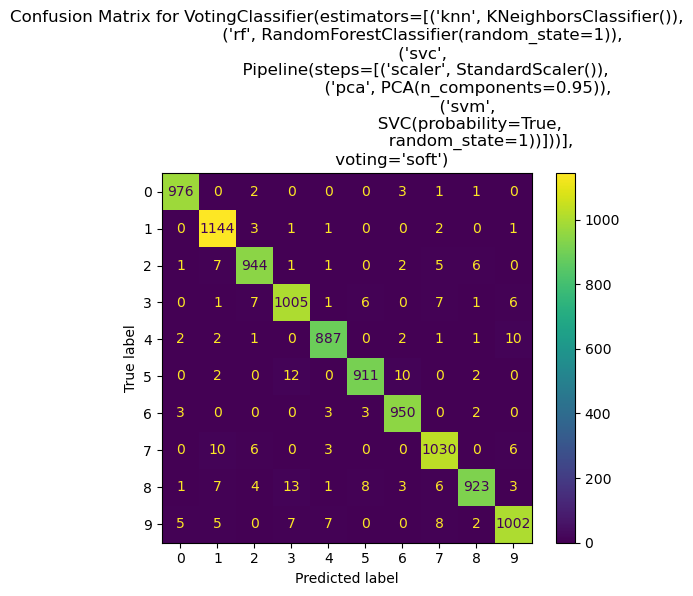

In [39]:
# Confusion Matrix
print('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.title(f'Confusion Matrix for {voting_clf}')
plt.show()

Retrain the model on the whole dataset before use in streamlit

In [21]:
#load the model
final_model = joblib.load("model_voting.pkl")

In [22]:
#train the odel on the whole dataset
final_model.fit(X, y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('pca', PCA(n_components=0.95)),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=1))]))],
                 voting='soft')

In [23]:
# save
joblib.dump(final_model, "final_model.pkl") 
# load
#final_model = joblib.load("final_model.pkl")

['final_model.pkl']